# 様々な Clustering を行なう 10本 Knock

#### Algorithm 一覧

| 名称                  | 分類  | 推奨 Sample | 事前 Cluster数 | 特徴                                          |
|---------------------|-----|-----------|-------------|---------------------------------------------|
| KMeans              | 非階層 | 10K未満     | 要           | もっとも基本的な手法                                  |
| MiniBatch KMeans    | 非階層 | 10K以上     | 要           | KMeans を一定の Size ごとに実行。Sample数が多い場合はこちらを使う。 |
| Spectral Clustering | 非階層 | 10K未満     | 要           | Data 密度で Cluster を作成するため非線形でも機能する           |
| GMM                 | 非階層 | 10K 未満    | 要           | 傾いた楕円形で Cluster を作成できる                      |
| MeanShift           | 非階層 | 10K未満     | 任意          | Cluster 数の指定が不要                             |
| VBGMM               | 非階層 | 10K未満     | 任意          | Cluster 数の指定は不要                             |
| DBSCAN              | 非階層 | -         | 不要          | Data 密度で Cluster を作成する。外れ値を判定できる            |
| HDBSCAN             | 階層  | -         | 不要          | DBSCAN を階層型に拡張                              |

### Knock11: SpectralClustering で Clustering を実施してみよう
- SpectralClustering は Data 密度で Clustering するため、同心円状になっていない Data も、うまく Clustering が可能。

In [26]:
# Moon data の読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing
from sklearn import datasets
from IPython.display import display

X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
display(X_norm)

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655],
       [ 0.55545785, -0.08853775],
       [ 0.05104108,  1.284163  ],
       [-0.17030547, -1.12065006],
       [-0.1659644 ,  1.28843594],
       [-1.46106881,  1.15527198],
       [ 1.63987535, -0.48630812],
       [ 0.41814803, -1.47618916],
       [-0.34023715,  1.50810931],
       [ 0.90980627, -1.26183242],
       [-0.88905065,  1.56616629],
       [-0.29208555, -0.66541512],
       [ 1.55266276, -0.70888274],
       [ 1.59187607, -0.4198694 ],
       [-0.37934026,

<function matplotlib.pyplot.show(*args, **kw)>

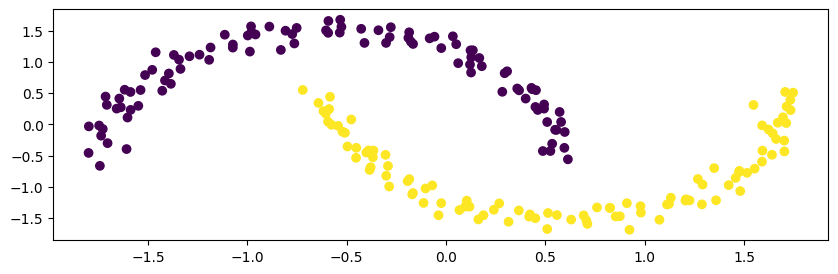

In [27]:
# Moon data の可視化
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z)
plt.show

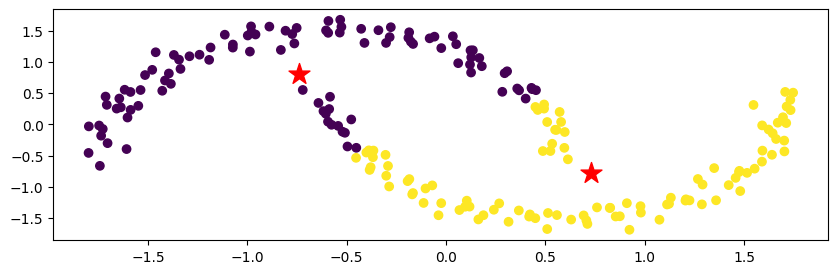

In [28]:
# k-means で clustering
km = cluster.KMeans(n_clusters=2)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.show()

k-means では中心点からの距離で Cluster が決まるため、同心円状に広がっていない Moon data ではうまく分析できない。

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


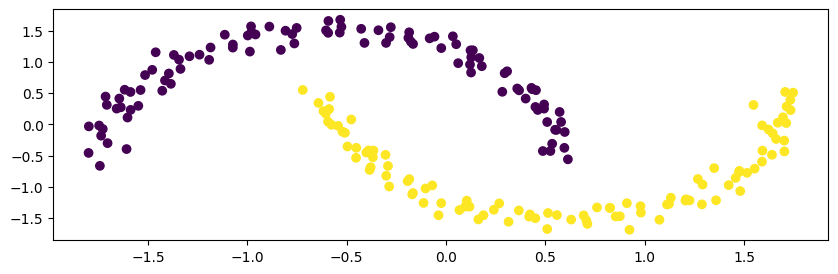

In [29]:
# SpectralCluster で clustering
spc = cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
    # affinity= : 親和性。Clustering を実施する際に作成する Graph 行列の作成方法を指定
    # Graph行列: Data がそれぞれどのように繋がっているかを示す行列。
    # nearest_neighbors: 最近傍
z_spc = spc.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_spc.labels_)
plt.show()

### Knock12: MeanShift を使った clustering を実施してみよう
- MeanShift は Cluster数が分からない場合に、Data を Cluster に分類する手法。
- 複数の Gauss分布（正規分布）を仮定して、各Data がどの Gauss分布に所属するかを決定し、Cluster分析する。

In [30]:
# Wine data の読み込み
df_wine_all = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = [u"class", u"color", u"proline"]
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


<function matplotlib.pyplot.show(*args, **kw)>

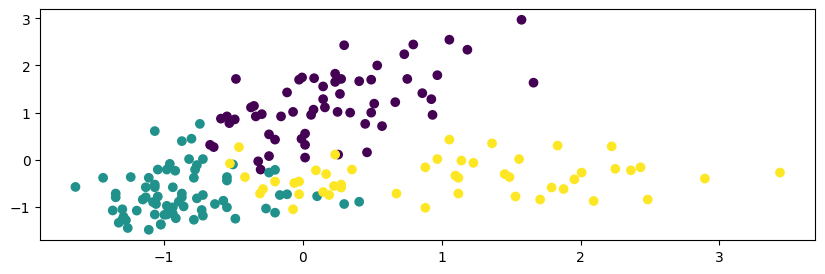

In [31]:
# Wine data の可視化
X = df_wine[['color', 'proline']]
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['class']
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z)
plt.show

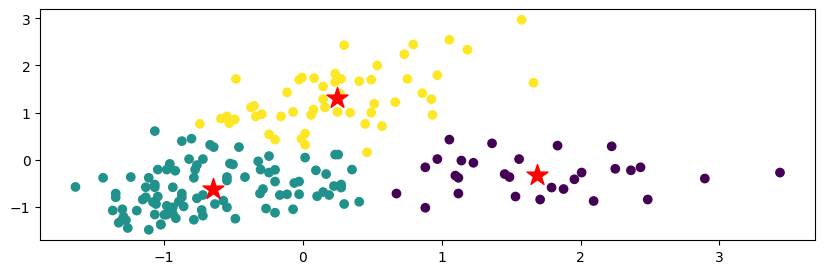

In [32]:
# k-means で clustering
km = cluster.KMeans(n_clusters=3)
z_km = km.fit(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.show()

k-means は、中心点から同心円状に広がって分類されている。

[[-0.6207637  -0.59667224]
 [ 1.49736922 -0.30032022]]


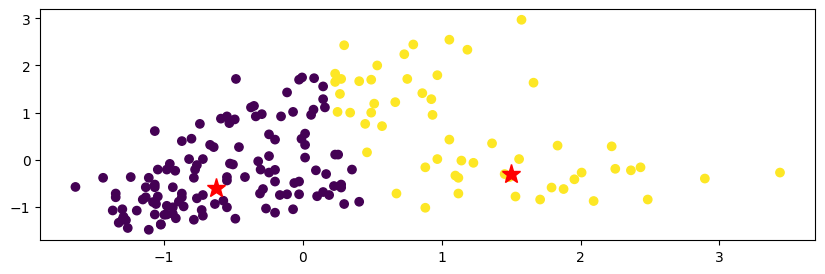

In [33]:
ms = cluster.MeanShift(seeds=X_norm)
ms.fit(X_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=labels)
plt.plot(cluster_centers[0, 0], cluster_centers[0, 1], marker='*', c='red', markersize=14)
plt.plot(cluster_centers[1, 0], cluster_centers[1, 1], marker='*', c='red', markersize=14)
plt.show()

##### MeanShift
- Cluster数を指定しなくても clustering が実施可能なため Parameter は `seeds`（乱数Seed）のみ設定可。（）
- k-means を Base として、近い Cluster をまとめていく。その際に規定の距離より近くなった Cluster はまとめて１つにしている。
###### `seeds=`
- 最初の Cluster を決めており、各 Data を中心とする Data数分の Cluster を用意している。

### Knock13: x-means で非階層型の Clustering を実施してみよう
#### x-means
k-means の Algorithm に加えて、ある Cluster が正規分布２つで表されるのと１つで表されるのでは、どちらが適切かを判定して、２つが適切な場合は Cluster を２つに分ける

In [34]:
# x-means で Clustering
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, initial_centers=xm_c, kmax=20, ccore=True)
xm_i.process()

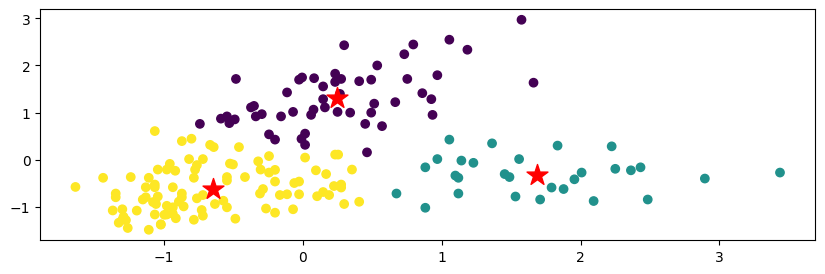

In [35]:
# Clustering 結果の可視化
z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k + 1

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:, 0], centers[:, 1], s=250, marker='*', c='red')
plt.show()

### Knock14: GMM で Clustering を実施してみよう
#### GMM(Gaussian Mixture Model)
各 Data がどの Gauss分布に所属している確立が高いか求めて Labeling する。

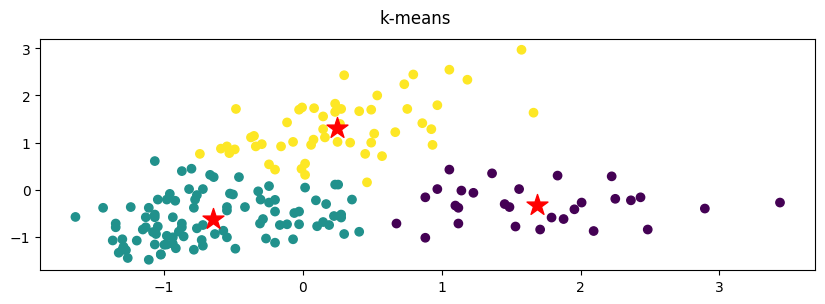

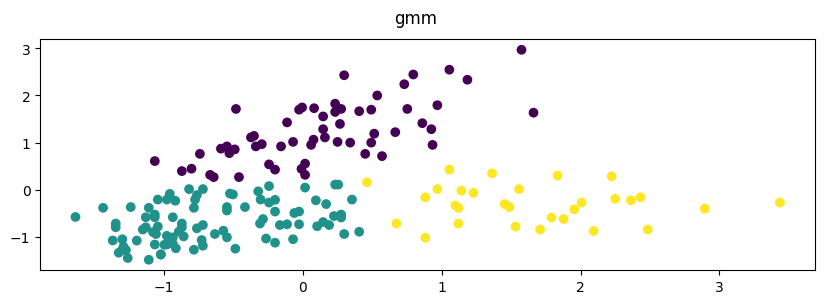

In [36]:
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('k-means')
plt.show()

from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
z_gmm = gmm.fit(X_norm)
z_gmm = z_gmm.predict(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_gmm)
plt.suptitle('gmm')
plt.show()

GMM と k-means とはほぼ同じだが
- k-means は、同心円状での分類
- GMM は、傾いた楕円形の分類

になる。GMM は、Gauss分布を仮定するため、各 Data がどの Cluster に所属するのか確立を求めることができる。

### Knock15: VBGMM で Clustering を実施してみよう
#### VBGMM(変分混合Gauss-model(Variation Bayesian Gaussian Mixture)
- Cluster数が分からない場合に有用な手法。
- 複数の Gauss分布を仮定して、各 Data がどの Gauss分布に所属するのかを決定して Cluster分析する。
- Bayes推定に基づいて確立分布を計算しながら Cluster数や分布の形状を求める。

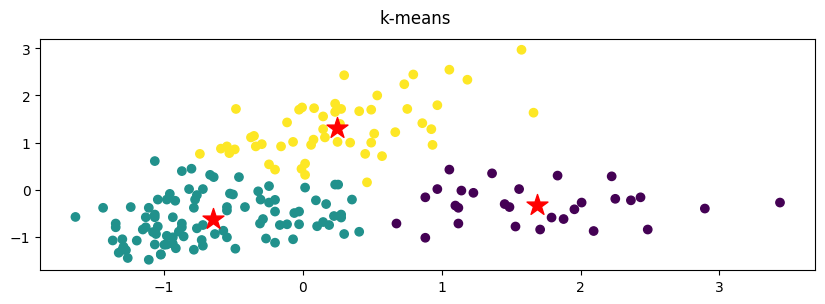

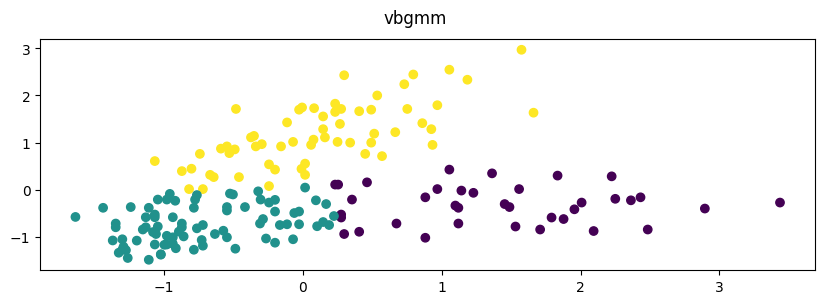

In [37]:
# VBGMM で Clustering
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('k-means')
plt.show()

from sklearn import mixture

vbgmm = mixture.BayesianGaussianMixture(n_components=10, random_state=0)  # n_components: Cluster数の上限
vbgmm = vbgmm.fit(X_norm)
labels = vbgmm.predict(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=labels)
plt.suptitle('vbgmm')
plt.show()

### Knock16: VBGMM で最適な Cluster数を探索してみよう
VBGMM は、.weights_ で Cluster ごとの各 Data の分布がわかる。

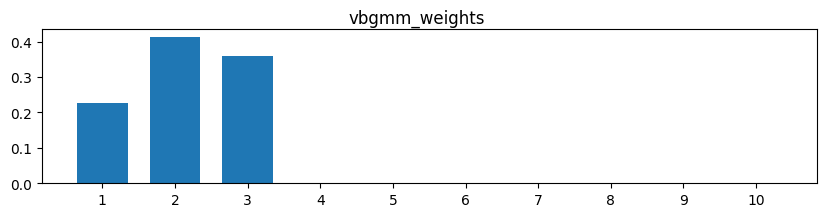

In [38]:
# Cluster ごとの各 Data の分布
x_tick = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(10, 2))
plt.bar(x_tick, vbgmm.weights_, width=0.7, tick_label=x_tick)
plt.suptitle('vbgmm_weights')
plt.show()

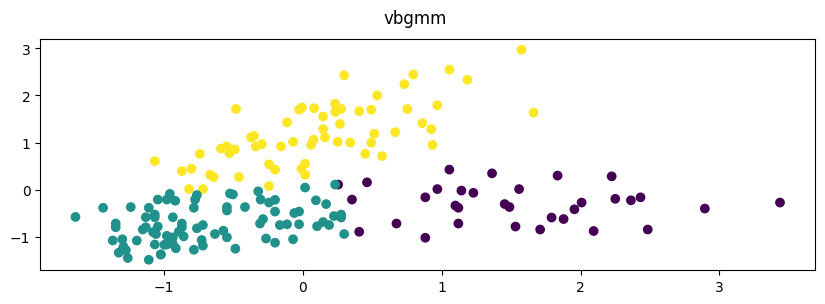

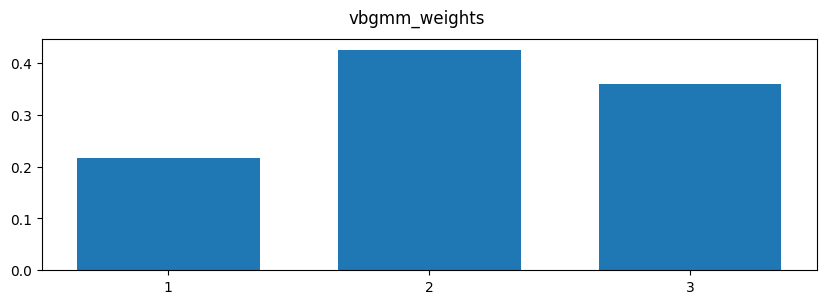

In [39]:
# VBGMM で clustering（Cluster数 3）
vbgmm = mixture.BayesianGaussianMixture(n_components=3, random_state=0)
vbgmm = vbgmm.fit(X_norm)
labels = vbgmm.predict(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=labels)
plt.suptitle('vbgmm')
plt.show()

x_tick = np.array([1, 2, 3])
plt.figure(figsize=[10, 3])
plt.bar(x_tick, vbgmm.weights_, width=0.7, tick_label=x_tick)
plt.suptitle('vbgmm_weights')
plt.show()

VBGMM では
1. `.weights_` を確認して、低い割合の Cluster がある。
2. `n_components` を下げてまとめる

という流れで Balance のよい Cluster数を探索できる。

### Knock17: MiniBatchKMeans で clustering を実施してみよう
MiniBatch で clustering を行なうことで、計算時間を大幅に短縮する。
※ k-means の結果と比べると少し精度が落ちることがある。
>MiniBatch
部分的に Sampling された入力 Data のこと。

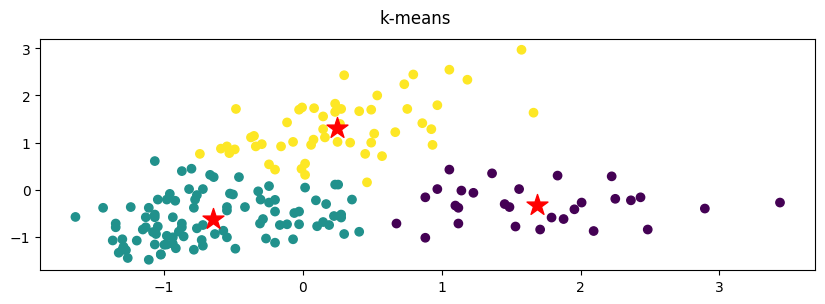

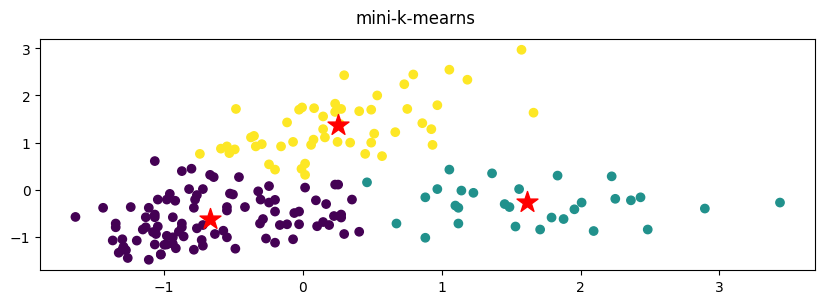

In [40]:
# MiniBatchKMeans で clustering
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('k-means')
plt.show()

minikm = cluster.MiniBatchKMeans(n_clusters=3, batch_size=100)  # batch_size: 設定 Data 数毎に更新する
z_minikm = minikm.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_minikm.labels_)
plt.scatter(z_minikm.cluster_centers_[:, 0], z_minikm.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('mini-k-mearns')
plt.show()

- Data数が１万個よりも多い場合、MiniBatchKMeans を使用することが推奨されている。
- GMM model などの感度のよい clustering は計算時間もそれなりにかかる為、MiniBatchKMeans を利用することを検討する。

### Knock18: DBSCAN で clustering を実施してみよう
#### DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- 密度準拠Clustering の Algorithm
- 密接している点を同じ Group にまとめ、低密度領域にある点を Noise（外れ値）と判定。各点が自身の半径以内にいくつあるかでその領域を Cluster として判断する。
- あらかじめ Cluster数を決めなくて良い、という長所がある。
- 近傍の密度がある閾値を超えている限り、Cluster を成長させ続ける。
- 半径以内にない点は Noise になる。

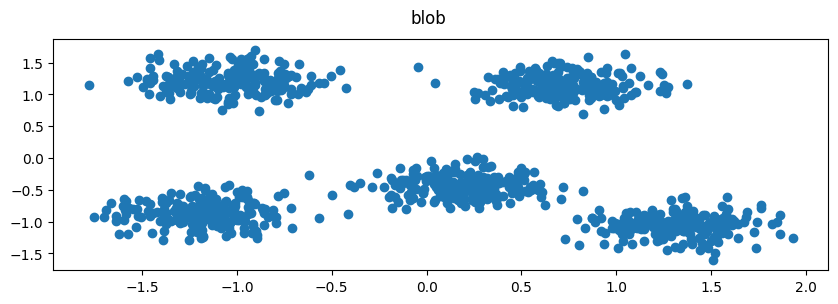

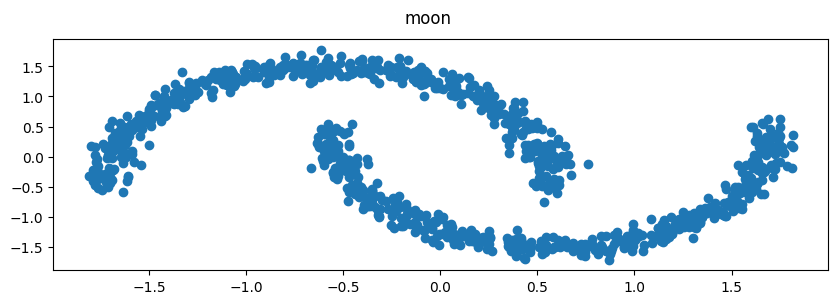

In [41]:
# Moon data と塊 data
X = datasets.make_blobs(n_samples=1000, random_state=10, centers=5, cluster_std=1.2)[0]
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y)
plt.suptitle('blob')
plt.show()

X_moon = datasets.make_moons(n_samples=1000, noise=0.05, random_state=0)[0]
sc = preprocessing.StandardScaler()
X_moon_norm = sc.fit_transform(X_moon)
x_moon = X_moon_norm[:, 0]
y_moon = X_moon_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x_moon, y_moon)
plt.suptitle('moon')
plt.show()

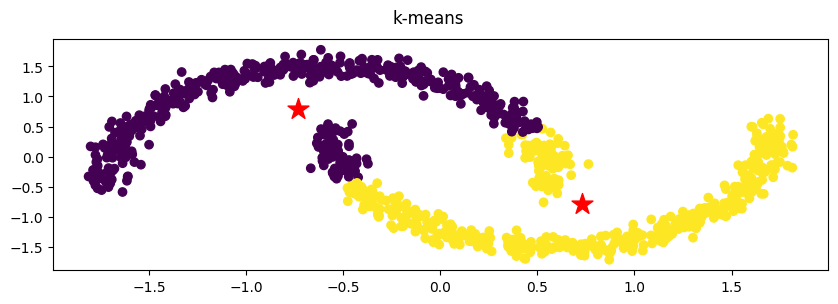

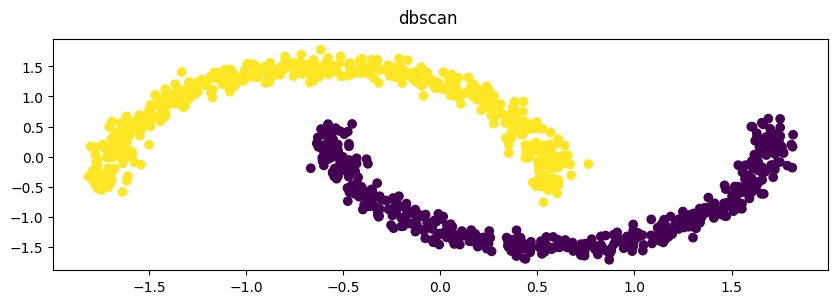

In [46]:
# DBSCAN で clustering (Moon data)
km_moon = cluster.KMeans(n_clusters=2)
z_km_moon = km_moon.fit(X_moon_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x_moon, y_moon, c=z_km_moon.labels_)
plt.scatter(z_km_moon.cluster_centers_[:, 0], z_km_moon.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('k-means')
plt.show()

dbscan = cluster.DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_moon_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x_moon, y_moon, c=labels)
plt.suptitle('dbscan')
plt.show()

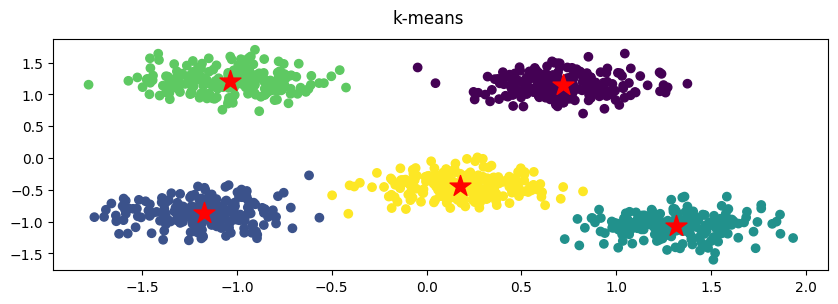

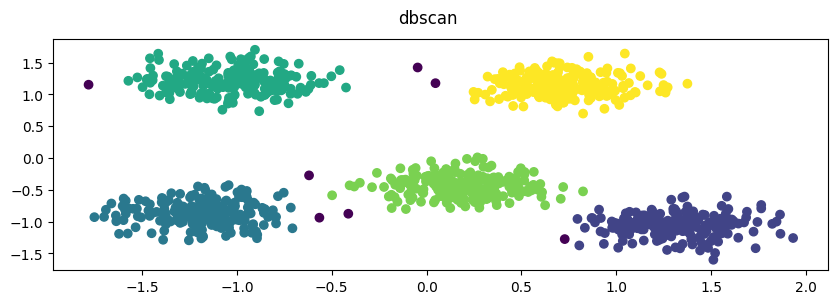

In [47]:
# DBSCAN で clustering (塊 Data)
km = cluster.KMeans(n_clusters=5)
z_km = km.fit(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.suptitle('k-means')

dbscan = cluster.DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
labels = dbscan.fit_predict(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=labels)
plt.suptitle('dbscan')
plt.show()

DBSCAN は、Data の密度を基準とする Algorithm のため、全 Data点は
- Core点
- 到達可能点
- Noise点

に分類される。

##### Parameter
- `eps`: 半径の設定
- `min_points`: Core点の判断をする為の最小値

1. `eps` Parameter で決めれられた半径内に `min_points` Parameter の値以上の点が集まっていれば、それは **Core点**であると判断する。
2. Core点でない Data でも、近くにある Core点から `eps`半径の中に入っているものは*到達可能点*であると判断する。
3. そのどちらにもなれなかった点は **Noise点**（外れ値）として分類される。

#### DBSCAN の特徴
- `eps` と `min_points` Parameter が重要。
- 球の形状を前提とせずに Noise も分離できるため Cluster数の指定が必要ない。
- 全 Data点を対象とした反復計算を実施しているため計算 Cost が高い。
  = Real time 性が求められているような場面には不向き
- Data が密集していると Parameter 調整が難しくなる。